# Introduction to Julia, part 1

<img src="./julia_logo.png" align="center" width="400"/>

https://julialang.org

## Types of programming languages

* **Compiler languages**: C/C++, Fortran, ... 
  - Directly compiled to machine code that is executed by CPU 
  - Pros: fast, memory efficient
  - Cons: longer development time, hard to debug

* **Interpreter languages**: R, MATLAB, Python, SAS IML, JavaScript, ... 
  - Interpreted by an interpreter
  - Pros: fast prototyping, scripting (Linux shell scripts, Perl)
  - Cons: excruciatingly slow for loops
  - Usually equipped with *REPL* (Read-Eval-Print Loop) or *shell*

* Mixed (dynamic) languages: Java, Kotlin, Scala
  - Compiled into *byte code* by the compiler, byte code is interpreted by the *virtual machine* (JVM). This scheme achieves architecture independence.
  - More and more interpreter languages are adopting JIT technology: R (version 3.4+), MATLAB (R2015b+), Python (PyPy), Julia, ...
      + functions will be compiled before execution on the first or second use. For subsequent uses (e.g., calling the function within a loop), the speedup is significant.

* Distinction between complier and interpreter languages is getting blurred due to improved computation capabilities of the modern hardware and advanced compiler techniques.

* Database languages: SQL, Hive (Hadoop).  
  - Data analysis *never* happens if we do not know how to retrieve data from databases  

## Take-home messages

* To be versatile in the big data era, familiarize yourself with at least one language in each category.

* To improve efficiency of interpreted languages such as R or Matlab, conventional wisdom is to avoid loops as much as possible, a.k.a., **vectorize** code
> The only loop you are allowed to have is that for an iterative algorithm.

* When looping is unavoidable, need to code in C, C++, or Fortran.  
Success stories: the popular `glmnet` package in R is coded in Fortran; `tidyverse` packages use a lot Rcpp/C++.

* Modern languages such as Julia tries to solve the **two language problem**:
    - Prototype code goes into a high-level language
    - Production code goes into a low-level language

## What's Julia?

> Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments.

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Long-term support release: v1.0.5, Sept. 2019
  - Current stable release: v1.6.2

* Aim to solve the notorious **two language problem**: Prototype code goes into high-level languages like R/Python, production code goes into low-level language like C/C++. 

    Julia aims to:
> Walks like Python. Runs like C.

<img src="./julia_vs_otherlang.png" align="center" width="800"/>

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
    - yet produces fast, low-level machine code that has traditionally only been generated by static languages.

* Julia is more than just "Fast R" or "Fast Matlab"
    - Performance comes from features that work well together.
    - You can't just take the magic dust that makes Julia fast and sprinkle it on your language of choice.

## R is great, but...

* The language encourages operating on the whole object (i.e. vectorized code). However, some tasks (e.g. MCMC) are not easily vectorized.

* Unvectorized R code (`for` and `while` loops) is slow. (http://adv-r.had.co.nz/Performance.html Section on performance starts with "Why is R slow?") 

* Techniques for large data sets – parallelization, memory mapping, database access, map/reduce – can be used but not easily. R is single threaded and most likely will stay that way.

* R functions should obey functional semantics (not modify arguments). Okay until you have very large objects on which small changes are made during parameter estimation.

* Sort-of object oriented using generic functions but implementation is casual. Does garbage collection but not based on reference counting.

* The real work is done in underlying C code and it is not easy to trace your way through it.

(by [Doug Bates](http://pages.stat.wisc.edu/~bates/), member of the R Core Team, author of `Matrix` and `lme4` packages, in [Julia for R programmers](http://pages.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf))

* Deficiencies in the core language 
  - Many fixed with packages (`devtools`, `roxygen2`, `Matrix`)
  - Others harder to fix (R uses an old version of BLAS)
  - Some impossible to fix (clunky syntax, poor design choices)
 
<!--
* Doug Bates' [Julia package for mixed-effects models](https://github.com/dmbates/MixedModels.jl)
    - Getting Doug on board was a big win for statistics with Julia, as he brought a lot of knowledge about the history of R development and design choices
    
    > As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia.   
    >
    > -- <cite>Doug Bates (on the [`knitr` Google Group](https://groups.google.com/forum/#!msg/knitr/F78PBMIamwk/X-d-zUhrdrkJ), 2013)</cite>
-->

## Learning resources

0. [Julia: A Fresh Approach to Numerical Computing](../../readings/BezansonEdelmanKarpinskiShah17Julia.pdf) by Jeff Bezanson, Alan Edelman, Stefan Karpinski, and Viral B. Shah, *SIAM REVIEW* Vol. 59, No. 1, pp. 65–98.

1. [Julia for R Programmers](http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf) by Doug Bates.

2. YouTube: [Intro to Julia](https://www.youtube.com/watch?v=8h8rQyEpiZA&t) (2h28m), by Jane Herriman. 

3. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

4. Browse the Julia [documentation](https://docs.julialang.org/en).  

5. For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

    For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  


6. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL (Read-Eval-Print Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julia prompt `julia>`. *Type backspace in other modes* to return to the default mode.    

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.  

3. **Shell mode** `shell>`. Type `;` to enter shell mode.  

4. **Package mode** `(@v1.6) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search model. 

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:  
1. `quit()` or `Ctrl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-colon) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`.

* Google (~~Naver~~).

* Julia documentation: <https://docs.julialang.org/en/>.

* Look up source code: `@edit fun(x)`.

* <https://discourse.julialang.org>.

* Friends.

## Some basic Julia code

In [1]:
# an integer, same as int in R
y = 1
typeof(y) 

Int64

In [2]:
# a Float64 number, same as double in R
y = 1.0
typeof(y) 

Float64

In [3]:
# Greek letters:  `\pi<tab>`
π

π = 3.1415926535897...

In [4]:
typeof(π)

Irrational{:π}

In [5]:
# Greek letters:  `\theta<tab>`
θ = y + π

4.141592653589793

In [6]:
# emoji! `\:kissing_cat:<tab>`
😽 = 5.0

5.0

In [7]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

In [8]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
# vector Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [10]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [11]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [12]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Matrix{Float64}:
 2.23823e-314  2.23823e-314  2.23823e-314
 2.23823e-314  2.23823e-314  2.23823e-314
 2.23823e-314  2.23823e-314  2.23823e-314
 2.23823e-314  2.23823e-314  2.23823e-314
 2.23823e-314  2.23823e-314  2.23823e-314

In [13]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [14]:
x

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [15]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [16]:
# rational number
a = 3//5

3//5

In [17]:
typeof(a)

Rational{Int64}

In [18]:
b = 3//7

3//7

In [19]:
a + b

36//35

In [20]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.917222  0.492968   0.506997
 0.564369  0.705425   0.594361
 0.989855  0.254588   0.626454
 0.929263  0.384029   0.420757
 0.749851  0.0123611  0.110815

In [21]:
# uniform random numbers (in Float16)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.575   0.6143  0.672
 0.508   0.6143  0.956
 0.1787  0.6953  0.5127
 0.951   0.4902  0.9736
 0.1094  0.294   0.4346

In [22]:
# random numbers from {1,...,5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 5  4  2
 4  1  1
 3  4  4
 3  2  2
 2  5  1

In [23]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
 -1.35588   -2.07941   -0.0943297
  1.48426   -2.36824   -0.121338
 -0.417874  -0.885322   0.794723
 -0.51738   -0.741182  -0.652738
  0.80346    1.51982    0.00194865

In [24]:
# range
1:10

1:10

In [25]:
typeof(1:10)

UnitRange{Int64}

In [26]:
1:2:10

1:2:9

In [27]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [28]:
# integers 1-10
x = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [29]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [30]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [31]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Julia package system

* Like R, the functionality of Julia can be extended by using packages.

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.   
Google search with `PackageName.jl` usually leads to the package on github.com. 

* The package ecosystem is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at https://julialang.org/packages/ 

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.6) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.6) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.6) pkg> add https://github.com/kose-y/ParProx.jl
```

* A package needs only be added once, at which point it is downloaded into your local `.julia/packages` directory in your home directory. 

Package dependencies are very important in reproducing results. In Julia they can be managed at each project, with `Project.toml' and 'Manifest.toml' files (see [here](https://bkamins.github.io/julialang/2020/05/10/julia-project-environments.html)). For example, this lecture note is a project whose environment has the following dependencies.

In [32]:
using Pkg
Pkg.activate("../..")   # root directory of this project
Pkg.dependencies()

  Activating environment at `~/Dropbox/class/M1399.000200/2021/M1399_000200-2021fall/Project.toml`


Dict{Base.UUID, Pkg.Types.PackageInfo} with 335 entries:
  UUID("c3611d14-8923-5661… => PackageInfo("ColorVectorSpace", v"0.8.7", "4d177…
  UUID("c8ffd9c3-330d-5841… => PackageInfo("MbedTLS_jll", nothing, nothing, fal…
  UUID("82899510-4779-5014… => PackageInfo("IteratorInterfaceExtensions", v"1.0…
  UUID("8ba89e20-285c-5b6f… => PackageInfo("Distributed", nothing, nothing, fal…
  UUID("01d81517-befc-4cb6… => PackageInfo("RecipesPipeline", v"0.4.0", "d4491b…
  UUID("d360d2e6-b24c-11e9… => PackageInfo("ChainRulesCore", v"1.3.0", "bdc0937…
  UUID("1b915085-20d7-51cf… => PackageInfo("WinReg", v"0.3.1", "808380e0a0483e1…
  UUID("90014a1f-27ba-587c… => PackageInfo("PDMats", v"0.11.1", "4dd403333bcf09…
  UUID("b964fa9f-0449-5b57… => PackageInfo("LaTeXStrings", v"1.2.1", "c7f1c695e…
  UUID("1d5cc7b8-4909-519e… => PackageInfo("IntelOpenMP_jll", v"2018.0.3+2", "d…
  UUID("f43a241f-c20a-4ad4… => PackageInfo("Downloads", nothing, nothing, false…
  UUID("f09324ee-3d7c-5217… => PackageInfo("Netpbm",

* Directory of a specific package can be queried by `pathof()`:

In [33]:
using Distributions

pathof(Distributions)  # should look different in your machine

"/Users/jhwon/.julia/packages/Distributions/Xrm9e/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages. 

* Periodically, one should run `update` in Pkg mode, which checks for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using 
```julia
Distributions.<FUNNAME>
```
All functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

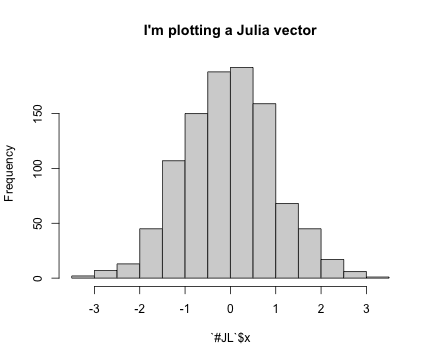

RObject{VecSxp}
$breaks
 [1] -3.5 -3.0 -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5

$counts
 [1]   2   7  13  45 107 150 188 192 159  68  45  17   6   1

$density
 [1] 0.004 0.014 0.026 0.090 0.214 0.300 0.376 0.384 0.318 0.136 0.090 0.034
[13] 0.012 0.002

$mids
 [1] -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25
[13]  2.75  3.25

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [34]:
using RCall

x = randn(1000)
R"""
hist($x, main="I'm plotting a Julia vector")
"""

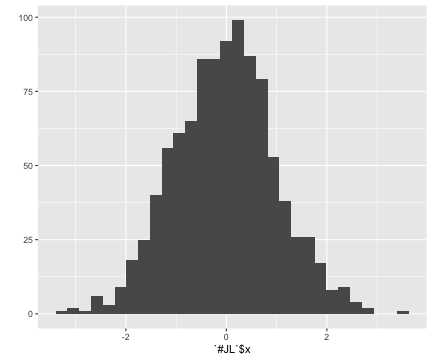

RObject{VecSxp}


┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall /Users/jhwon/.julia/packages/RCall/iMDW2/src/io.jl:160


In [35]:
R"""
library(ggplot2)
qplot($x)
"""

In [36]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1] -0.59467966  0.19183698  1.01365013 -0.23308723 -0.95605632  1.83734304
 [7]  0.42575554 -0.15120627  0.71033825  0.02100083


In [37]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
 -0.5946796615832428
  0.19183698057483567
  1.0136501325788987
 -0.23308723434716358
 -0.9560563177872824
  1.8373430438442337
  0.42575553774222785
 -0.15120626678439014
  0.710338250026511
  0.02100082755853701

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
Julia> @rget r
```

* If you want to call Julia within R, check out the [`XRJulia`](https://cran.r-project.org/web/packages/XRJulia/) package by John Chambers.

## Timing and benchmark

### Julia

`@time`, `@elapsed`, `@allocated` macros:

In [38]:
using Random # standard library
Random.seed!(123) # seed
x = rand(1_000_000) # 1 million random numbers in [0, 1)

@time sum(x) # first run includes compilation time

  0.027803 seconds (78.02 k allocations: 4.629 MiB, 94.44% compilation time)


500060.34072352527

In [39]:
@time sum(x) # no compilation time after first run

  0.000494 seconds (1 allocation: 16 bytes)


500060.34072352527

In [40]:
# just the runtime
@elapsed sum(x)

0.000482225

In [41]:
# just the allocation
@allocated sum(x)

16

Use package `BenchmarkTools.jl` for more robust benchmarking. Analog of `microbenchmark` package in R.

In [42]:
using BenchmarkTools

bm = @benchmark sum($x)  # '$' to avoid problems with globals

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  248.689 μs … 744.500 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     323.519 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   340.148 μs ±  52.431 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

           ▂▅▇██▅▅▄▁                                             
  ▁▁▁▁▂▃▄▅▇██████████▇▇▆▇▇▇▇▆▆▆▅▄▅▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▂▁▁▁ ▃
  249 μs           Histogram: frequency by time          515 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [43]:
using Statistics # standard library
benchmark_result = Dict() # a dictionary to store median runtime (in milliseconds)
benchmark_result["Julia builtin"] = median(bm.times) / 1e6

0.3235185

### C

We would use the low-level C code as the baseline for copmarison. In Julia, we can easily run compiled C code using the `ccall` function. This is similar to `.C` in R.

In [44]:
using Libdl

C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()   # make a temporary file

# compile to a shared library by piping C_code to gcc
# (works only if you have gcc installed):

open(`gcc -std=c99 -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum (generic function with 1 method)

In [45]:
# make sure it gives same answer
c_sum(x)

500060.340723512

In [46]:
bm = @benchmark c_sum($x)

BenchmarkTools.Trial: 3560 samples with 1 evaluation.
 Range (min … max):  1.009 ms …   1.989 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.390 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.393 ms ± 169.572 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

                             ▁█▆▅         ▃▃▄▆▂                
  ▁▁▂▄▄▅▅▅▅▄▅▄▄▆▄▅▃▄▅▅▄▄▄▅▅▆██████▅▆▅▅▅▄▆██████▇▅▅▅▄▃▄▂▂▂▁▁▂▁ ▄
  1.01 ms         Histogram: frequency by time        1.75 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [47]:
# store median runtime (in milliseconds)
benchmark_result["C"] = median(bm.times) / 1e6

1.3899105

### R, builtin `sum`

Next we compare to the build in `sum` function in R, which is implemented using C.

In [48]:
using RCall

R"""
library(microbenchmark)
y <- $x
rbm <- microbenchmark(sum(y))
"""

RObject{VecSxp}
Unit: milliseconds
   expr      min       lq    mean   median       uq      max neval
 sum(y) 1.001586 1.205742 1.25296 1.265741 1.315713 1.481196   100


In [49]:
# store median runtime (in milliseconds)
@rget rbm # dataframe
benchmark_result["R builtin"] = median(rbm[!, :time]) / 1e6

1.265741

### R, handwritten loop

Handwritten loop in R is much slower.

In [50]:
using RCall

R"""
sum_r <- function(x) {
  s <- 0
  for (xi in x) {
    s <- s + xi
  }
  s
}
library(microbenchmark)
y <- $x
rbm <- microbenchmark(sum_r(y))
"""

RObject{VecSxp}
Unit: milliseconds
     expr      min       lq     mean   median       uq      max neval
 sum_r(y) 13.16677 13.81682 14.39918 14.09342 14.70751 17.45945   100


In [51]:
# store median runtime (in milliseconds)
@rget rbm # dataframe
benchmark_result["R loop"] = median(rbm[!, :time]) / 1e6

14.093423

### Python, builtin `sum`

Built in function `sum` in Python.

In [52]:
using PyCall
PyCall.pyversion

v"3.7.3"

In [53]:
# get the Python built-in "sum" function:
pysum = pybuiltin("sum")
bm = @benchmark $pysum($x)

BenchmarkTools.Trial: 63 samples with 1 evaluation.
 Range (min … max):  77.592 ms … 86.986 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     80.163 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   80.385 ms ±  2.024 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▂   ▅  ▅  ▂  █  ▅█▂                   ▂                      
  █▅▁██▅▅█▅▅█▅██▅▁███▅▅▁█▅█▅█▁▅▅▁▅▁▁▁▁▅▅█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅ ▁
  77.6 ms         Histogram: frequency by time        86.8 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [54]:
# store median runtime (in miliseconds)
benchmark_result["Python builtin"] = median(bm.times) / 1e6

80.163379

### Python, handwritten loop

In [55]:
using PyCall

py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""

sum_py = py"py_sum"

bm = @benchmark $sum_py($x)

BenchmarkTools.Trial: 52 samples with 1 evaluation.
 Range (min … max):  89.401 ms … 113.021 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     97.006 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   96.785 ms ±   4.022 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▁    ▁           ▄▄      ▁▁▁ █ ▁▁ ▁▁ ▁     ▁              
  ▆▁▆▁█▁▆▁▁█▁▁▁▆▁▆▁▆▁▁▆██▁▁▆▆▁▆███▆█▁██▆██▁█▆▆▁▆▁█▆▁▁▁▆▁▁▆▁▁▁▆ ▁
  89.4 ms         Histogram: frequency by time          104 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [56]:
# store median runtime (in miliseconds)
benchmark_result["Python loop"] = median(bm.times) / 1e6

97.0064115

### Python, numpy

Numpy is the high-performance scientific computing library for Python (mostly written in C).

In [57]:
# bring in sum function from Numpy 
numpy_sum = pyimport("numpy")."sum"

PyObject <function sum at 0x7fdad3a6a7b8>

In [58]:
bm = @benchmark $numpy_sum($x)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  309.452 μs …  1.150 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     339.085 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   365.942 μs ± 76.031 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ██▆▅▅▅▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁▂▁▁▁▁ ▁▁  ▁                           ▂
  ███████████████████████████████▇█████▇██▇▆▇█▇█▇▇▇▆▆▅▆▆▆▆▆▆▅▃ █
  309 μs        Histogram: log(frequency) by time       675 μs <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [59]:
# store median runtime (in miliseconds)
benchmark_result["Python numpy"] = median(bm.times) / 1e6

0.339085

Numpy performance is on a par with Julia built-in `sum` function. Both are about 3 times faster than C, probably because of insufficient optimization in compliation and overhead of passing Julia objects and receiving C pointers.

### Summary

In [60]:
benchmark_result

Dict{Any, Any} with 7 entries:
  "R builtin"      => 1.26574
  "Julia builtin"  => 0.323518
  "Python builtin" => 80.1634
  "C"              => 1.38991
  "Python loop"    => 97.0064
  "Python numpy"   => 0.339085
  "R loop"         => 14.0934

* `C` and `R builtin` are the baseline C performance (gold standard).

* `Python builtin` and `Python loop` are 80-100 fold slower than C because the loop is interpreted.

* `R loop` is about 30 folder slower than C and indicates the performance of bytecode generated by its compiler package (turned on by default since R v3.4.0 (Apr 2017)). 

* `Julia builtin` and `Python numpy` are 3-4 fold faster than C.

## Acknowledgment

This lecture note has evolved from [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Winter Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.